In [34]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

In [11]:
with open("data/beatmap_data.pkl", "rb") as pkl:
    loaded = pickle.load(pkl)

In [23]:
b_id, b_data, b_extra_data, b_skill = zip(*[(l[1], l[2], l[3], l[4])for l in loaded])
b_extra_data = np.array(b_extra_data)
df = pd.DataFrame({"ID":b_id,"Skillset":b_skill, "AR":b_extra_data[:,0],"BPM_Min":b_extra_data[:,1],"BPM":b_extra_data[:,2], "BPM_Max":b_extra_data[:,3]})

In [ ]:
df.head(3)

,ID,Skillset,AR,BPM_Min,BPM,BPM_Max
0,2096201,RHYTHM,9.0,133.0,133.0,133.0
1,2096523,ALT,9.6,118.0,150.0,200.0
2,2167576,ALT,9.4,118.0,150.0,200.0


<Axes: xlabel='Skillset', ylabel='percent'>

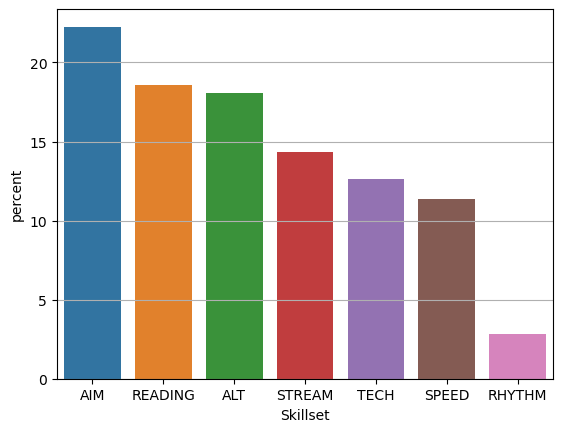

In [89]:
plt.grid()
sns.countplot(df, x="Skillset", hue="Skillset",order=df.Skillset.value_counts().keys(), hue_order=df.Skillset.value_counts().keys(), stat="percent")

In [52]:
b_len = [len(b) for b in b_data]

In [83]:
stats = pd.DataFrame({"Data Lengths":b_len}).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
stats

,Data Lengths
count,3940.000000
mean,1504.709137
std,554.088514
min,387.000000
25%,1126.000000
50%,1432.000000
75%,1765.000000
90%,2183.300000
95%,2547.100000
max,6915.000000


In [69]:
stats.loc["count",:]

Data Lengths    3940.0
Name: count, dtype: float64

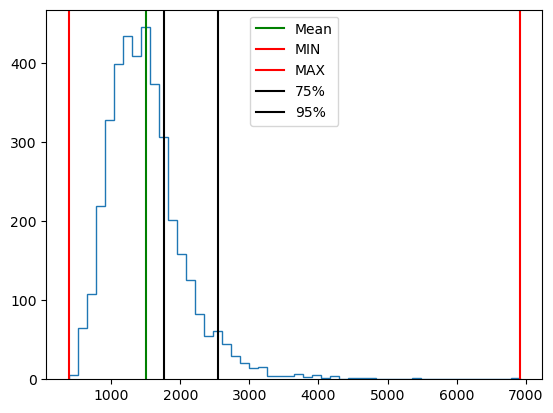

In [84]:
plt.hist(b_len, bins=50, histtype="step")
plt.axvline(stats.loc["mean"].values, color="green", label ="Mean")
plt.axvline(stats.loc["min"].values, color="red", label ="MIN")
plt.axvline(stats.loc["max"].values, color="red", label ="MAX")
plt.axvline(stats.loc["75%"].values, color="black", label ="75%")
plt.axvline(stats.loc["95%"].values, color="black", label ="95%")
plt.legend()
plt.show()

In [88]:
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).iloc[1:]

,AR,BPM_Min,BPM,BPM_Max
mean,9.186764,174.942097,186.857553,192.450132
std,0.809242,55.892951,37.784426,132.356950
min,0.000000,-600.000000,72.000000,75.000000
5%,8.000000,99.000000,130.000000,130.000000
25%,9.200000,150.000000,165.000000,168.000000
50%,9.400000,180.000000,185.000000,186.000000
75%,9.600000,200.000000,202.000000,206.000000
95%,9.800000,249.810000,258.100000,268.000000
max,10.000000,310.000000,320.000000,7139.434433


In [102]:
b_data[3][:,3][-1]

0.9986904458033227